# Clustering

## Agenda:

1. K-means clustering
2. Clustering evaluation
3. DBSCAN clustering

<b> Overview </b>
- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters). 

- Primarily used for exploratory data analysis and business applications like customer segmentation, product segmentation, market segmentation.

----
In this class we will explore a cluster technique called k-means & DBSCAN and understand how they works.

- Introduction to k-means() clustering
- Scaling of data before cluster analysis
- Dendogram to find out optimal number of clusters
- DBSCAN clustering

---
Can a clustering algorithm group them together by how nearer they are to each other?¶

Using K-means clustering technique
- k-mean calculates the distance between the points and the center using euclidean distance and then allocates the points to different clusters.

This dataset contains sample of beer brands and analyzes to understand the type of beer the is manufactured and what kind of market is targets. This gives an insight into different segments of market and presence of different beers in different segments.

Attribute Description:
- name - the beer brand
- calories - calories per ounce
- sodium
- alcohol - alcohol percentage present
- cost - in dollars

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn
%matplotlib inline

In [2]:
# beer dataset
beer = pd.read_csv('C:\\Users\\pd147\\Downloads\\Analytixlabs_Exl_21082017\\ML-2\\3. Segmentation\\beer.txt', sep=' ')
beer

name  calories  sodium  alcohol  cost
0              Budweiser       144      15      4.7  0.43
1                Schlitz       151      19      4.9  0.43
2              Lowenbrau       157      15      0.9  0.48
3            Kronenbourg       170       7      5.2  0.73
4               Heineken       152      11      5.0  0.77
5          Old_Milwaukee       145      23      4.6  0.28
6             Augsberger       175      24      5.5  0.40
7   Srohs_Bohemian_Style       149      27      4.7  0.42
8            Miller_Lite        99      10      4.3  0.43
9        Budweiser_Light       113       8      3.7  0.40
10                 Coors       140      18      4.6  0.44
11           Coors_Light       102      15      4.1  0.46
12        Michelob_Light       135      11      4.2  0.50
13                 Becks       150      19      4.7  0.76
14                 Kirin       149       6      5.0  0.79
15     Pabst_Extra_Light        68      15      2.3  0.38
16                 Hamms       139      19      4.4  0.43
17   Heilemans_Old_Style       144      24      4.9  0.43
18   Olympia_Goled_Light        72       6      2.9  0.46
19         Schlitz_Light        97       7      4.2  0.47

How would you cluster these beers?

In [3]:
# define X
X = beer.drop('name', axis=1)

What happened to y?

## Part 1: K-means clustering

In [4]:
from sklearn.cluster import KMeans

In [5]:
KMeans?

In [6]:
# K-means with 3 clusters
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [84]:
km.inertia_

2427.5071642857142

In [7]:
# review the cluster labels
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1])

In [11]:
# save the cluster labels and sort by cluster
beer['cluster3'] = km.labels_
beer.sort_values('cluster3')

name  calories  sodium  alcohol  cost  cluster3
0              Budweiser       144      15      4.7  0.43         0
1                Schlitz       151      19      4.9  0.43         0
2              Lowenbrau       157      15      0.9  0.48         0
3            Kronenbourg       170       7      5.2  0.73         0
4               Heineken       152      11      5.0  0.77         0
5          Old_Milwaukee       145      23      4.6  0.28         0
6             Augsberger       175      24      5.5  0.40         0
7   Srohs_Bohemian_Style       149      27      4.7  0.42         0
17   Heilemans_Old_Style       144      24      4.9  0.43         0
16                 Hamms       139      19      4.4  0.43         0
10                 Coors       140      18      4.6  0.44         0
14                 Kirin       149       6      5.0  0.79         0
12        Michelob_Light       135      11      4.2  0.50         0
13                 Becks       150      19      4.7  0.76         0
9        Budweiser_Light       113       8      3.7  0.40         1
8            Miller_Lite        99      10      4.3  0.43         1
11           Coors_Light       102      15      4.1  0.46         1
19         Schlitz_Light        97       7      4.2  0.47         1
15     Pabst_Extra_Light        68      15      2.3  0.38         2
18   Olympia_Goled_Light        72       6      2.9  0.46         2

In [10]:
beer.

name  calories  sodium  alcohol  cost  cluster3
0    Budweiser       144      15      4.7  0.43         0
1      Schlitz       151      19      4.9  0.43         0
2    Lowenbrau       157      15      0.9  0.48         0
3  Kronenbourg       170       7      5.2  0.73         0
4     Heineken       152      11      5.0  0.77         0

What do the clusters seem to be based on? Why?

In [12]:
# review the cluster centers
km.cluster_centers_

array([[ 150.        ,   17.        ,    4.52142857,    0.52071429],
       [ 102.75      ,   10.        ,    4.075     ,    0.44      ],
       [  70.        ,   10.5       ,    2.6       ,    0.42      ]])

In [13]:
# calculate the mean of each feature for each cluster
beer.groupby('cluster3').mean()

calories  sodium   alcohol      cost
cluster3                                      
0           150.00    17.0  4.521429  0.520714
1           102.75    10.0  4.075000  0.440000
2            70.00    10.5  2.600000  0.420000

In [21]:
# save the DataFrame of cluster centers
centers = beer.groupby('cluster3').mean()

In [18]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [19]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

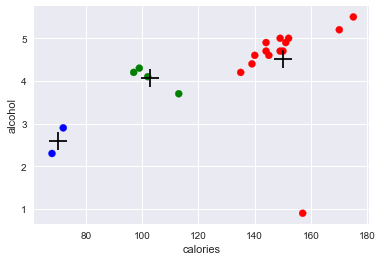

In [22]:
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(beer.calories, beer.alcohol, c=colors[beer.cluster3], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('calories')
plt.ylabel('alcohol')

C:\Users\pd147\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C9E9C88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CF6DEB8>]], dtype=object)

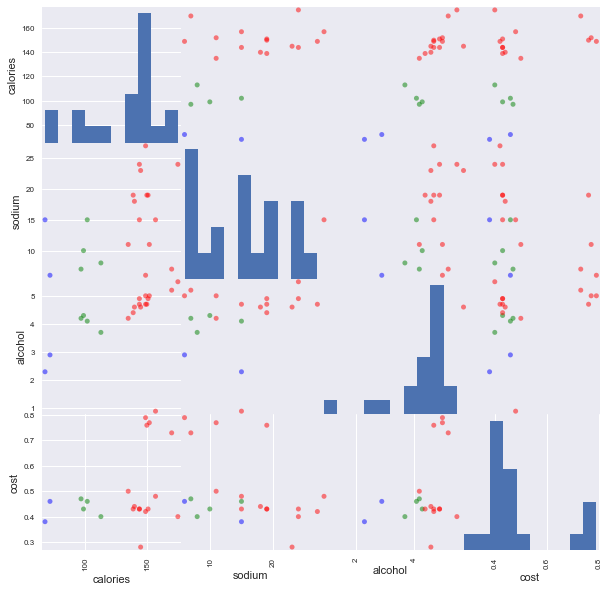

In [23]:
# scatter plot matrix (0=red, 1=green, 2=blue)
pd.scatter_matrix(X, c=colors[beer.cluster3], figsize=(10,10), s=100)

It can be observed that the segments are mostly based on calories. High, medium and low calories. This is because scale of calogies is larger than the scale of other parameters. So, we need to scale all parameters and then cluster it.

### Repeat with scaled data

In [24]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
pd.DataFrame(X_scaled).describe()

0             1             2             3
count  2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01
mean  -3.219647e-16  7.771561e-17 -1.003711e-15 -3.608225e-16
std    1.025978e+00  1.025978e+00  1.025978e+00  1.025978e+00
min   -2.186883e+00 -1.395248e+00 -3.149822e+00 -1.519224e+00
25%   -7.554993e-01 -8.496201e-01 -6.129894e-02 -4.745363e-01
50%    3.879133e-01  7.794680e-03  3.395018e-01 -4.214165e-01
75%    5.996564e-01  6.313691e-01  6.224200e-01 -6.728499e-02
max    1.438159e+00  1.878518e+00  1.188256e+00  2.092917e+00

In [26]:
# K-means with 3 clusters on scaled data
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [28]:
# save the cluster labels and sort by cluster
beer['cluster_3_a'] = km.labels_
beer.sort_values('cluster_3_a')

name  calories  sodium  alcohol  cost  cluster3  \
0              Budweiser       144      15      4.7  0.43         0   
1                Schlitz       151      19      4.9  0.43         0   
17   Heilemans_Old_Style       144      24      4.9  0.43         0   
16                 Hamms       139      19      4.4  0.43         0   
5          Old_Milwaukee       145      23      4.6  0.28         0   
6             Augsberger       175      24      5.5  0.40         0   
7   Srohs_Bohemian_Style       149      27      4.7  0.42         0   
10                 Coors       140      18      4.6  0.44         0   
15     Pabst_Extra_Light        68      15      2.3  0.38         2   
12        Michelob_Light       135      11      4.2  0.50         0   
11           Coors_Light       102      15      4.1  0.46         1   
9        Budweiser_Light       113       8      3.7  0.40         1   
8            Miller_Lite        99      10      4.3  0.43         1   
2              Lowenbrau       157      15      0.9  0.48         0   
18   Olympia_Goled_Light        72       6      2.9  0.46         2   
19         Schlitz_Light        97       7      4.2  0.47         1   
13                 Becks       150      19      4.7  0.76         0   
14                 Kirin       149       6      5.0  0.79         0   
4               Heineken       152      11      5.0  0.77         0   
3            Kronenbourg       170       7      5.2  0.73         0   

    cluster_3_a  
0             0  
1             0  
17            0  
16            0  
5             0  
6             0  
7             0  
10            0  
15            1  
12            1  
11            1  
9             1  
8             1  
2             1  
18            1  
19            1  
13            2  
14            2  
4             2  
3             2

What are the "characteristics" of each cluster?

In [29]:
# review the cluster centers
beer.groupby('cluster_3_a').mean()

calories  sodium  alcohol    cost  cluster3
cluster_3_a                                             
0             148.375  21.125   4.7875  0.4075         0
1             105.375  10.875   3.3250  0.4475         1
2             155.250  10.750   4.9750  0.7625         0

C:\Users\pd147\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D458B38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D986D30>]], dtype=object)

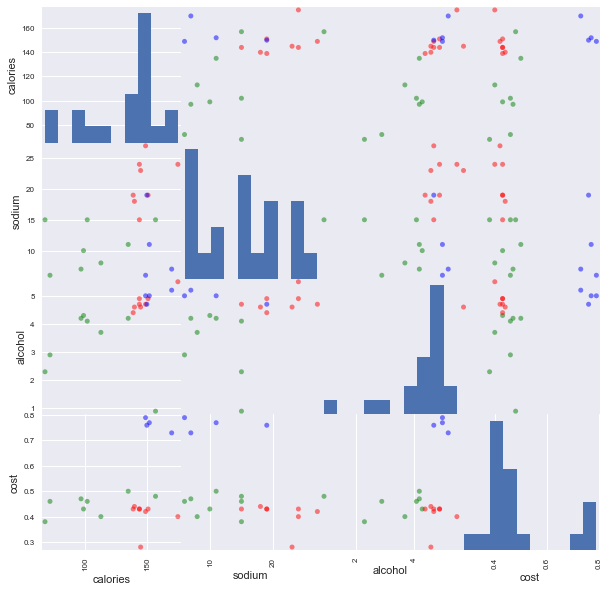

In [30]:
# scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
pd.scatter_matrix(X, c=colors[beer.cluster_3_a], figsize=(10,10), s=100)

Do you notice any cluster assignments that seem a bit odd? How might we explain those?

Even now the clusters are not very distinct. The clusters are mostly based on calories and alcohol percentage. This may be because we are looking for wrong number of clusters.

## Part 2: Clustering evaluation (Finding optimal number of clusters)

This explains how to find optimal number of clusters in a given dataset by using various techniques.
Different techniques discussed here are
- Dendogram
- Elbow method
- Silhoutte score Analysis
We will first load the data into dataframe and scale the features and create clusters. And then various metrics are calculated to validate the number of cluster creations and what will be the optimal number of clusters.

---
The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

---
- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
- The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

# Using Dendogram

- Dendogram shows the distance between any two observations in a dataset. The vertical axis determines the distance. The longer the axis, the larger the distance.
- The clustermap feature in seaborn provides the dendogram. It also displays the distance between observations as well as the features. But we are mostly interested in observations.

C:\Anaconda2\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


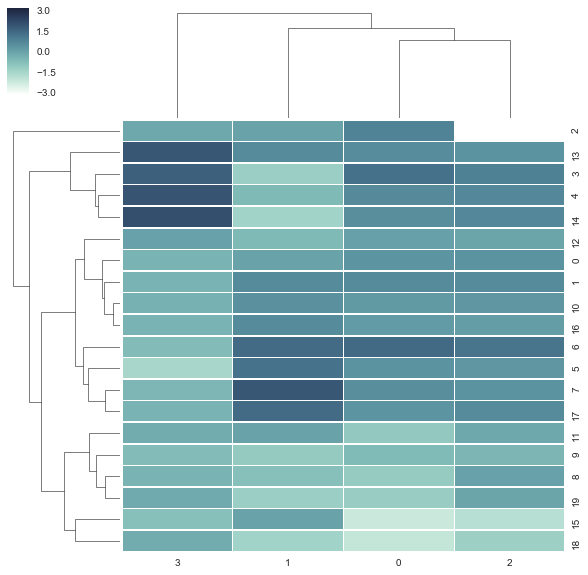

In [24]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sn.clustermap(X_scaled, cmap=cmap, linewidths=.5)

<b> Note: </b>

- From the diagram it can observed that the number of clusters or groups of observations present are between 3 to 6. Based on business context the number of clusters can be created.

- The dendogram shows there are 5 disctinct clusters. Or we can consolidate them into 4 clusters. Too many segments may be harder to interpret, so we will stick to 4 segments here.

# Elbow Analysis

- The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.
- Explained Variance: This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.
- if one plots the percentage of variance explained by the clusters against the number of clusters the first clusters will add much information (explain a lot of variance), but at some point the marginal gain in explained variance will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion"
- Given a set of observations (x1, x2, …, xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, …, Sk} so as to minimize the within-cluster sum of squares (WCSS) (sum of distance functions of each point in the cluster to the K center).
-In other words, its objective is to find:
argminS∑i=1k∑x∈Si∥x−μi∥2

 

In [39]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

In [40]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [41]:
clusters_df[0:10]

cluster_errors  num_clusters
0       80.000000             1
1       51.459153             2
2       27.849901             3
3       17.843595             4
4       12.388815             5
5        9.570665             6
6        7.232908             7
7        5.918853             8
8        4.788812             9
9        3.644205            10

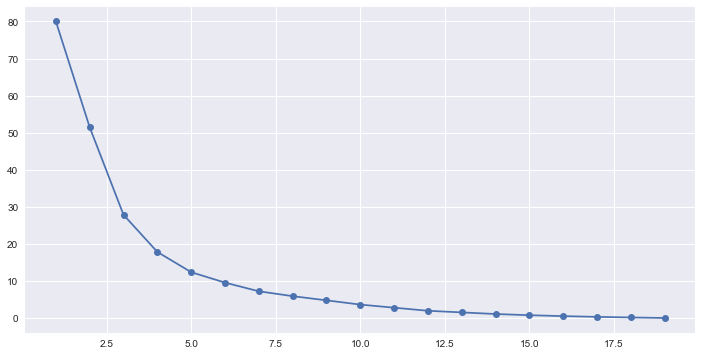

In [42]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# Note:
- The elbow diagram shows that the gain in explained variance reduces significantly from 3 to 4 to 5. So, optimal number of clusters could either 4 or 5. 
- The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.

# Silhouette Coefficient

In [26]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)

0.45777415910909475

In [27]:
# calculate SC for K=3 through K=12
k_range = range(3, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

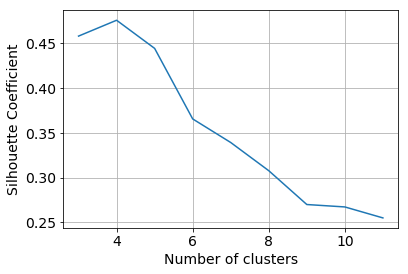

In [28]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

# K-Means cluster solution

In [29]:
# K-means with 4 clusters on scaled data
km = KMeans(n_clusters=4, random_state=1)
km.fit(X_scaled)
beer['cluster4'] = km.labels_
beer.sort('cluster4')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


name  calories  sodium  alcohol  cost  cluster3  \
0              Budweiser       144      15      4.7  0.43         0   
1                Schlitz       151      19      4.9  0.43         0   
17   Heilemans_Old_Style       144      24      4.9  0.43         0   
16                 Hamms       139      19      4.4  0.43         0   
5          Old_Milwaukee       145      23      4.6  0.28         0   
6             Augsberger       175      24      5.5  0.40         0   
7   Srohs_Bohemian_Style       149      27      4.7  0.42         0   
10                 Coors       140      18      4.6  0.44         0   
15     Pabst_Extra_Light        68      15      2.3  0.38         2   
12        Michelob_Light       135      11      4.2  0.50         0   
11           Coors_Light       102      15      4.1  0.46         1   
9        Budweiser_Light       113       8      3.7  0.40         1   
8            Miller_Lite        99      10      4.3  0.43         1   
18   Olympia_Goled_Light        72       6      2.9  0.46         2   
19         Schlitz_Light        97       7      4.2  0.47         1   
13                 Becks       150      19      4.7  0.76         0   
14                 Kirin       149       6      5.0  0.79         0   
4               Heineken       152      11      5.0  0.77         0   
3            Kronenbourg       170       7      5.2  0.73         0   
2              Lowenbrau       157      15      0.9  0.48         0   

    cluster_3_a  cluster4  
0             0         0  
1             0         0  
17            0         0  
16            0         0  
5             0         0  
6             0         0  
7             0         0  
10            0         0  
15            1         1  
12            1         1  
11            1         1  
9             1         1  
8             1         1  
18            1         1  
19            1         1  
13            2         2  
14            2         2  
4             2         2  
3             2         2  
2             1         3

In [100]:
clusters = KMeans(4)  # 4 clusters
clusters.fit( X )
beer["cluster_final"] = clusters.labels_
beer[['name', 'calories', 'sodium', 'alcohol', 'cost', 'cluster_final']]

name  calories  sodium  alcohol  cost  cluster_final
0              Budweiser       144      15      4.7  0.43              2
1                Schlitz       151      19      4.9  0.43              2
2              Lowenbrau       157      15      0.9  0.48              2
3            Kronenbourg       170       7      5.2  0.73              0
4               Heineken       152      11      5.0  0.77              2
5          Old_Milwaukee       145      23      4.6  0.28              2
6             Augsberger       175      24      5.5  0.40              0
7   Srohs_Bohemian_Style       149      27      4.7  0.42              2
8            Miller_Lite        99      10      4.3  0.43              1
9        Budweiser_Light       113       8      3.7  0.40              1
10                 Coors       140      18      4.6  0.44              2
11           Coors_Light       102      15      4.1  0.46              1
12        Michelob_Light       135      11      4.2  0.50              2
13                 Becks       150      19      4.7  0.76              2
14                 Kirin       149       6      5.0  0.79              2
15     Pabst_Extra_Light        68      15      2.3  0.38              3
16                 Hamms       139      19      4.4  0.43              2
17   Heilemans_Old_Style       144      24      4.9  0.43              2
18   Olympia_Goled_Light        72       6      2.9  0.46              3
19         Schlitz_Light        97       7      4.2  0.47              1

In [101]:
beer_0 = beer[['name', 'calories', 'sodium', 'alcohol', 'cost', 'cluster_final']][beer.cluster_final == 0]
beer_0 

name  calories  sodium  alcohol  cost  cluster_final
3  Kronenbourg       170       7      5.2  0.73              0
6   Augsberger       175      24      5.5  0.40              0

 Segment 0 seems to be very high on calories and high on alcohol, made for people who want to get drunk.

In [28]:
beer_0.mean()

calories         172.500
sodium            15.500
alcohol            5.350
cost               0.565
cluster_final      0.000
dtype: float64

In [29]:
np.round( clusters.cluster_centers_, 2 )

array([[ 172.5 ,   15.5 ,    5.35,    0.56],
       [ 102.75,   10.  ,    4.08,    0.44],
       [ 146.25,   17.25,    4.38,    0.51],
       [  70.  ,   10.5 ,    2.6 ,    0.42]])

Let's look at segment-1

In [30]:
beer_1 = beer[['name', 'calories', 'sodium', 'alcohol', 'cost', 'cluster_final']][beer.cluster_final == 1]
beer_1

name  calories  sodium  alcohol  cost  cluster_final
8       Miller_Lite        99      10      4.3  0.43              1
9   Budweiser_Light       113       8      3.7  0.40              1
11      Coors_Light       102      15      4.1  0.46              1
19    Schlitz_Light        97       7      4.2  0.47              1

Segment 1 seems to be also light beers, which are probably made for people who drink regularly, but also health conscious, so want to keep calories and sodium level low.

In [31]:
beer_1.mean()

calories         102.750
sodium            10.000
alcohol            4.075
cost               0.440
cluster_final      1.000
dtype: float64

Let's look at segment-2

In [32]:
beer_2 = beer[['name', 'calories', 'sodium', 'alcohol', 'cost', 'cluster_final']][beer.cluster_final == 2]
beer_2

name  calories  sodium  alcohol  cost  cluster_final
0              Budweiser       144      15      4.7  0.43              2
1                Schlitz       151      19      4.9  0.43              2
2              Lowenbrau       157      15      0.9  0.48              2
4               Heineken       152      11      5.0  0.77              2
5          Old_Milwaukee       145      23      4.6  0.28              2
7   Srohs_Bohemian_Style       149      27      4.7  0.42              2
10                 Coors       140      18      4.6  0.44              2
12        Michelob_Light       135      11      4.2  0.50              2
13                 Becks       150      19      4.7  0.76              2
14                 Kirin       149       6      5.0  0.79              2
16                 Hamms       139      19      4.4  0.43              2
17   Heilemans_Old_Style       144      24      4.9  0.43              2

Segment 2 seems to be regular beers, high on calories and alcohol. These are beers that most beer lovers would drink. This market is crowded with too many brands.

In [33]:
beer_2.mean()

calories         146.250000
sodium            17.250000
alcohol            4.383333
cost               0.513333
cluster_final      2.000000
dtype: float64

Let's look at segment-3

In [37]:
beer_3 = beer[['name', 'calories', 'sodium', 'alcohol', 'cost', 'cluster_final']][beer.cluster_final == 3]
beer_3

name  calories  sodium  alcohol  cost  cluster_final
15    Pabst_Extra_Light        68      15      2.3  0.38              3
18  Olympia_Goled_Light        72       6      2.9  0.46              3

Segment 3 seems to be extra light beers, which are low on calogies and low on alcohol. These are made for people who donot drink regularly, but may be forced to drink on social occasions or gatherings. Not very crowded market. But consumers would also be less.

In [38]:
beer_3.mean()

calories         70.00
sodium           10.50
alcohol           2.60
cost              0.42
cluster_final     3.00
dtype: float64

Conclusion:
- The entry to segment 0 and 3 would be easier. It is a niche market and not many brands are present, but volume of customer woule also be less.
- Entry into segment 1 and 2 are crowded, but most of the customers are present in this segment.

## Part 3: DBSCAN clustering
### Density-based spatial clustering of applications with noise (DBSCAN) 

In [31]:
# DBSCAN with eps=1 and min_samples=3
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=3)
db.fit(X_scaled)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    min_samples=3, n_jobs=1, p=None)

In [32]:
# review the cluster labels
db.labels_

array([ 0,  0, -1,  1,  1, -1, -1,  0,  2,  2,  0,  2,  0, -1,  1, -1,  0,
        0, -1,  2], dtype=int64)

In [34]:
# save the cluster labels and sort by cluster
beer['cluster'] = db.labels_
beer.sort_values('cluster')

name  calories  sodium  alcohol  cost  cluster3  \
2              Lowenbrau       157      15      0.9  0.48         0   
5          Old_Milwaukee       145      23      4.6  0.28         0   
6             Augsberger       175      24      5.5  0.40         0   
18   Olympia_Goled_Light        72       6      2.9  0.46         2   
13                 Becks       150      19      4.7  0.76         0   
15     Pabst_Extra_Light        68      15      2.3  0.38         2   
0              Budweiser       144      15      4.7  0.43         0   
1                Schlitz       151      19      4.9  0.43         0   
7   Srohs_Bohemian_Style       149      27      4.7  0.42         0   
17   Heilemans_Old_Style       144      24      4.9  0.43         0   
10                 Coors       140      18      4.6  0.44         0   
16                 Hamms       139      19      4.4  0.43         0   
12        Michelob_Light       135      11      4.2  0.50         0   
3            Kronenbourg       170       7      5.2  0.73         0   
4               Heineken       152      11      5.0  0.77         0   
14                 Kirin       149       6      5.0  0.79         0   
9        Budweiser_Light       113       8      3.7  0.40         1   
8            Miller_Lite        99      10      4.3  0.43         1   
11           Coors_Light       102      15      4.1  0.46         1   
19         Schlitz_Light        97       7      4.2  0.47         1   

    cluster_3_a  cluster  
2             1       -1  
5             0       -1  
6             0       -1  
18            1       -1  
13            2       -1  
15            1       -1  
0             0        0  
1             0        0  
7             0        0  
17            0        0  
10            0        0  
16            0        0  
12            1        0  
3             2        1  
4             2        1  
14            2        1  
9             1        2  
8             1        2  
11            1        2  
19            1        2

In [35]:
# review the cluster centers
beer.groupby('cluster').mean()

calories  sodium   alcohol      cost  cluster3  cluster_3_a
cluster                                                               
-1       127.833333    17.0  3.483333  0.460000  0.666667     0.833333
 0       143.142857    19.0  4.628571  0.440000  0.000000     0.142857
 1       157.000000     8.0  5.066667  0.763333  0.000000     2.000000
 2       102.750000    10.0  4.075000  0.440000  1.000000     1.000000

C:\Users\pd147\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D956550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E34A0F0>]], dtype=object)

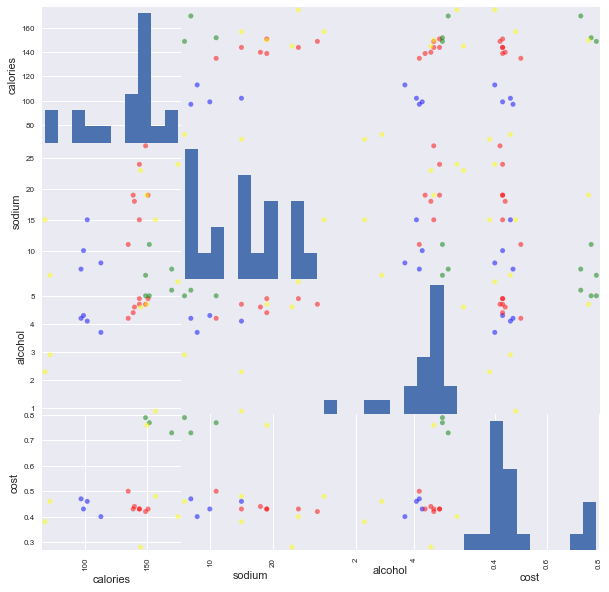

In [36]:
# scatter plot matrix of DBSCAN cluster assignments (0=red, 1=green, 2=blue, -1=yellow)
pd.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100)

### OBJECTIVE SEGMENTATION (Decision Trees)

<b> Using Decision Trees for Classification </b>

We will discuss how to build classification model and how to evaluate a model.

<b> Agenda: </b>
- Loading dataset
- creating dummy variables
- splitting the data set
- Building a decision tree model and searching the optimal tree depth
- Exporting the decision tree graph
- Calculating GINI impurity

<b> Business Problem: </b>
The objective of the problem is understanding what factors contribute to CHD and can CHD be predicted by building an analytical model.

---
What is coronary heart disease?
- Coronary heart disease (CHD) is when your coronary arteries (the arteries that supply your heart muscle with oxygen-rich blood) become narrowed by a gradual build-up of fatty material within their walls. These arteries can become narrowed through build-up of plaque, which is made up of cholesterol and other substances. Narrowed arteries can cause symptoms, such as chest pain (angina), shortness of breath, and fatigue.

Dataset Description
- Data is avaialable at: http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/ And header informtion is available at: http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.info.txt

- A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in Rousseauw et al, 1983, South African Medical Journal.

In [1]:
import pandas as pd

In [4]:
saheart_ds = pd.read_csv( "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data" )

In [5]:
saheart_ds.head()

row.names  sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  \
0          1  160    12.00  5.73      23.11  Present     49    25.30    97.20   
1          2  144     0.01  4.41      28.61   Absent     55    28.87     2.06   
2          3  118     0.08  3.48      32.28  Present     52    29.14     3.81   
3          4  170     7.50  6.41      38.03  Present     51    31.99    24.26   
4          5  134    13.60  3.50      27.78  Present     60    25.99    57.34   

   age  chd  
0   52    1  
1   63    1  
2   46    0  
3   58    1  
4   49    1

In [6]:
saheart_ds.drop("row.names",axis=1,inplace=True)

In [7]:
saheart_ds.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')

In [8]:
saheart_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
sbp          462 non-null int64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null object
typea        462 non-null int64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null int64
chd          462 non-null int64
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


The class label int the column chd indicates if the person has a coronary heart disease: negative (0) or positive (1).

Attributes description:

- sbp: systolic blood pressure
- tobacco: cumulative tobacco (kg)
- ldl: low densiity lipoprotein cholesterol
- adiposity: the size of the hips compared to the person's height
- famhist: family history of heart disease (Present, Absent)
- typea: type-A behavior
- obesity: BMI index
- alcohol: current alcohol consumption
- age: age at onset
    
There are no missing information. This is good news as we do not have to impute any data.

In [7]:

saheart_ds.chd.value_counts()

0    302
1    160
Name: chd, dtype: int64

In [8]:
chd_df = pd.DataFrame( saheart_ds.chd.value_counts() )

In [9]:
chd_df

chd
0  302
1  160

In [10]:
chd_df['has_chd'] = chd_df.index
chd_df

chd  has_chd
0  302        0
1  160        1

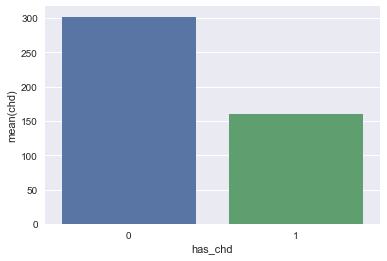

In [11]:
sn.barplot(  x = 'has_chd', y = 'chd', data = chd_df  )

In [12]:
# Encoding categorical variables

saheart_model_df = pd.get_dummies( saheart_ds )

In [13]:
saheart_model_df.head()

row.names  sbp  tobacco   ldl  adiposity  typea  obesity  alcohol  age  \
0          1  160    12.00  5.73      23.11     49    25.30    97.20   52   
1          2  144     0.01  4.41      28.61     55    28.87     2.06   63   
2          3  118     0.08  3.48      32.28     52    29.14     3.81   46   
3          4  170     7.50  6.41      38.03     51    31.99    24.26   58   
4          5  134    13.60  3.50      27.78     60    25.99    57.34   49   

   chd  famhist_Absent  famhist_Present  
0    1               0                1  
1    1               1                0  
2    0               0                1  
3    1               0                1  
4    1               0                1

In [14]:
saheart_model_df = saheart_model_df.drop( "row.names", axis = 1 )

In [15]:
saheart_model_df.head()

sbp  tobacco   ldl  adiposity  typea  obesity  alcohol  age  chd  \
0  160    12.00  5.73      23.11     49    25.30    97.20   52    1   
1  144     0.01  4.41      28.61     55    28.87     2.06   63    1   
2  118     0.08  3.48      32.28     52    29.14     3.81   46    0   
3  170     7.50  6.41      38.03     51    31.99    24.26   58    1   
4  134    13.60  3.50      27.78     60    25.99    57.34   49    1   

   famhist_Absent  famhist_Present  
0               0                1  
1               1                0  
2               0                1  
3               0                1  
4               0                1

In [16]:

saheart_model_df.columns

Index([u'sbp', u'tobacco', u'ldl', u'adiposity', u'typea', u'obesity',
       u'alcohol', u'age', u'chd', u'famhist_Absent', u'famhist_Present'],
      dtype='object')

In [17]:
# SPlitting the data
from sklearn.cross_validation import train_test_split

feature_cols = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'famhist_Present' ]

train_X, test_X, train_y, test_y = train_test_split( saheart_model_df[feature_cols],
                                    saheart_model_df['chd'],
                                    test_size = 0.3,
                                    random_state = 42 )

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
len( train_X )

323

In [19]:
len( test_X )

139

# Buidling the tree model

In [20]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export

In [21]:
# Searching optimal depth of tree
depths_list = [2,3,4,5,6]

for depth in depths_list:
    clf_tree = DecisionTreeClassifier( max_depth = depth )
    clf_tree.fit( train_X, train_y )
    print( "Tree Depth: ", depth, " - Accuracy: ", metrics.accuracy_score( test_y, clf_tree.predict( test_X ) ) )

('Tree Depth: ', 2, ' - Accuracy: ', 0.65467625899280579)
('Tree Depth: ', 3, ' - Accuracy: ', 0.61870503597122306)
('Tree Depth: ', 4, ' - Accuracy: ', 0.64028776978417268)
('Tree Depth: ', 5, ' - Accuracy: ', 0.64028776978417268)
('Tree Depth: ', 6, ' - Accuracy: ', 0.62589928057553956)


Note: Tree depth of 4 seems to be optimal, where the accuracy is highest.

In [22]:
clf_tree = DecisionTreeClassifier( max_depth = 4 )

In [23]:
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [24]:
tree_predict = clf_tree.predict( test_X )

In [25]:
metrics.accuracy_score( test_y, tree_predict )

0.64748201438848918

In [26]:
tree_cm = metrics.confusion_matrix( test_y, tree_predict )

AttributeError: 'module' object has no attribute 'ylabel'

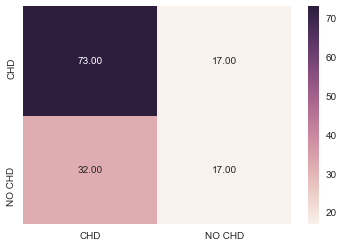

In [27]:
sn.heatmap(tree_cm, annot=True,  fmt='.2f', xticklabels = ["CHD", "NO CHD"] , yticklabels = ["CHD", "NO CHD"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

To create a decision tree visualization graph.

- Install GraphViz (As per the OS and version you are using)
- pip install pydotplus

Note: The notebook needs a restart.

In [35]:
export_graphviz( clf_tree,
                out_file = "chd_tree.dot",
                feature_names = train_X.columns )

In [37]:
import pydotplus as pdot

chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree.dot' )

In [38]:
chd_tree_graph

In [39]:
%pwd

u'C:\\Users\\ChandraMouli\\Desktop\\Advanced Big Data Science\\segmentation'

In [40]:
chd_tree_graph.write_jpg( 'chd_tree.jpg' )

InvocationException: GraphViz's executables not found

In [41]:
from IPython.display import Image
Image(filename='chd_tree.jpg')

How Gini Index is calculated?
Two metrics for choosing how to split a tree. Gini measurement is the probability of a random sample being classified correctly if we randomly pick a label according to th distribution in a branch.

Gini impurity can be computed by summing the probability  fifi  of an item with label  ii being chosen times the probability  1−fi1−fi  of a mistake in categorizing that item. It reaches its minimum (zero) when all cases in the node fall into a single target category.

IG(f)=∑i=1Jfi(1−fi)=∑i=1J(fi−fi2)=∑i=1Jfi−∑i=1Jfi2=1−∑i=1Jfi2
IG(f)=∑i=1Jfi(1−fi)=∑i=1J(fi−fi2)=∑i=1Jfi−∑i=1Jfi2=1−∑i=1Jfi2
 
In this specific example,

sample size: 323 No of samples for two classes are: 212 and 111

So, Gini Impurity at node level 1 is

In [73]:
gini_node_1 = 1 - pow(212/323, 2) - pow (111/323, 2)
print( gini_node_1 )

1


In [74]:
Information gain is reduction is impurity after splitting the dataset.

Gininode1−Gininode2Gininode1−Gininode2 
For second level, gini impurity for left split is  GinileftsplitGinileftsplit 

SyntaxError: invalid syntax (<ipython-input-74-0b84c7b58d1e>, line 1)

In [75]:
gini_left_split = 1 - pow(153/194, 2) - pow (41/194, 2)
gini_left_split

1

For second level, gini impurity for right split is  GinirightsplitGinirightsplit 

In [77]:

gini_right_split = 1 - pow(59/129, 2) - pow (70/129, 2)
gini_right_split

1

Information gain is

In [78]:
info_gain = gini_node1 - (194/323)*gini_left_split - (129/323)*gini_right_split

NameError: name 'gini_node1' is not defined

In [79]:
info_gain

NameError: name 'info_gain' is not defined